<a href="https://colab.research.google.com/github/realover82/AINFT-Lab/blob/master/catdog_ver20_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
-O /tmp/cats_and_dogs_filtered.zip

--2022-07-20 01:15:27--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  33.6MB/s    in 1.9s    

2022-07-20 01:15:30 (33.6 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content/drive/MyDrive/deeplearning/tmp2')
zip_ref.close()

In [ ]:
import os
import zipfile

local_zip = '/content/drive/MyDrive/deeplearning/dogs-vs-cats.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content/drive/MyDrive/deeplearning/tmp')
zip_ref.close()

In [3]:
cd 

/root


In [4]:
cd ..

/


In [9]:
import os

In [10]:
# 기본 경로
base_dir = '/content/drive/MyDrive/deeplearning/tmp2/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# 훈련에 사용되는 고양이/개 이미지 경로
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
print(train_cats_dir)
print(train_dogs_dir)

# 테스트에 사용되는 고양이/개 이미지 경로
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print(validation_cats_dir)
print(validation_dogs_dir)

/content/drive/MyDrive/deeplearning/tmp2/cats_and_dogs_filtered/train/cats
/content/drive/MyDrive/deeplearning/tmp2/cats_and_dogs_filtered/train/dogs
/content/drive/MyDrive/deeplearning/tmp2/cats_and_dogs_filtered/validation/cats
/content/drive/MyDrive/deeplearning/tmp2/cats_and_dogs_filtered/validation/dogs


In [11]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:5])
print(train_dog_fnames[:5])

['cat.127.jpg', 'cat.126.jpg', 'cat.125.jpg', 'cat.124.jpg', 'cat.123.jpg']
['dog.127.jpg', 'dog.126.jpg', 'dog.125.jpg', 'dog.124.jpg', 'dog.123.jpg']


In [12]:
print('Total training cat images :', len(os.listdir(train_cats_dir)))
print('Total training dog images :', len(os.listdir(train_dogs_dir)))

print('Total validation cat images :', len(os.listdir(validation_cats_dir)))
print('Total validation dog images :', len(os.listdir(validation_dogs_dir)))

Total training cat images : 1000
Total training dog images : 1000
Total validation cat images : 500
Total validation dog images : 500


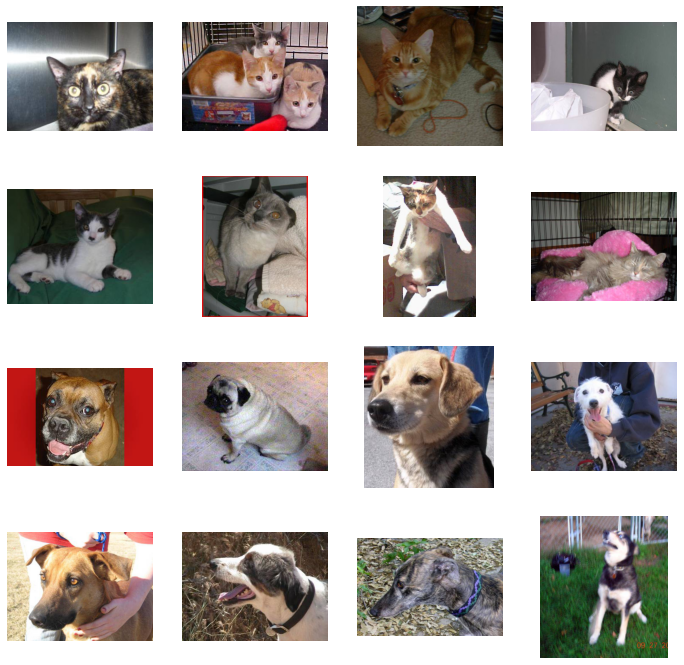

In [13]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index-8:pic_index]]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [14]:
import tensorflow as tf


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [15]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
            loss='binary_crossentropy',
            metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150, 150))
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                       batch_size=20,
                                                       class_mode  = 'binary',
                                                       target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=100,
                    epochs=2,
                    validation_steps=50,
                    verbose=2)

Epoch 1/2
100/100 - 324s - loss: 0.8227 - accuracy: 0.5510 - val_loss: 0.6794 - val_accuracy: 0.6420 - 324s/epoch - 3s/step
Epoch 2/2
100/100 - 12s - loss: 0.6881 - accuracy: 0.6350 - val_loss: 0.7120 - val_accuracy: 0.5490 - 12s/epoch - 118ms/step


In [18]:
# -- Save model -- 
model.save('/content/drive/MyDrive/deeplearning/tmp2/my_model-catdog-ver2-1.h5')

14.전이학습 https://codetorial.net/tensorflow/transfer_learning.html

In [25]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
  -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-07-21 07:43:33--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.122.128, 172.253.63.128, 142.251.111.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.122.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   233MB/s    in 0.4s    

2022-07-21 07:43:33 (233 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [26]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                              include_top=False,
                              weights=None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False

pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_3[0][0]']               
 alization)                                                                                       
                                                                                       

In [27]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [28]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

model.compile(optimizer=RMSprop(lr=0.0001),
            loss='binary_crossentropy',
            metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [29]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define our example directories and files
base_dir = '/content/drive/MyDrive/deeplearning/tmp2/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255.,
                                 rotation_range=40,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255.)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150, 150))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                      batch_size=20,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [30]:
history = model.fit(
  train_generator,
  validation_data=validation_generator,
  steps_per_epoch=100,
  epochs=2,
  validation_steps=50,
  verbose=2
)

Epoch 1/2
100/100 - 26s - loss: 0.3418 - accuracy: 0.8675 - val_loss: 0.0967 - val_accuracy: 0.9620 - 26s/epoch - 261ms/step
Epoch 2/2
100/100 - 22s - loss: 0.2180 - accuracy: 0.9140 - val_loss: 0.1261 - val_accuracy: 0.9490 - 22s/epoch - 223ms/step


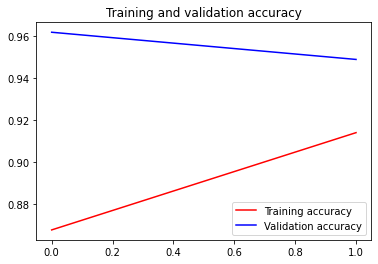

<Figure size 432x288 with 0 Axes>

In [31]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [34]:
import os

In [35]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving KakaoTalk_20220411_063656432_13.jpg to KakaoTalk_20220411_063656432_13 (2).jpg


FileNotFoundError: ignored

15. 다중 클래스 분류 문제 https://codetorial.net/tensorflow/multiclass_classification.html

In [ ]:
# 훈련용 이미지
!wget --no-check-certificate \
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
  -O /tmp/rps.zip

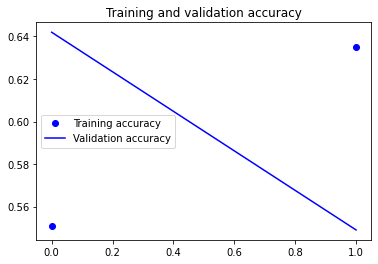

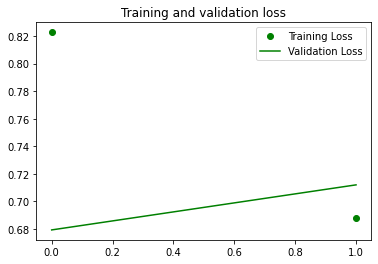

In [19]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [22]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving cat.0.jpg to cat.0.jpg


FileNotFoundError: ignored

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# train_datagen = ImageDataGenerator(rescale = 1.0/255.)
train_datagen = ImageDataGenerator(rescale = 1.0/255.,
                                 rotation_range=40,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 fill_mode='nearest')
test_datagen  = ImageDataGenerator(rescale = 1.0/255.)

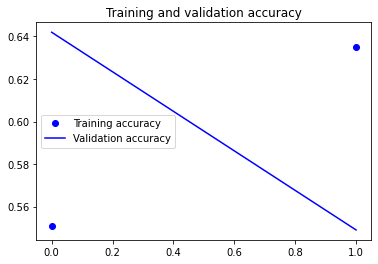

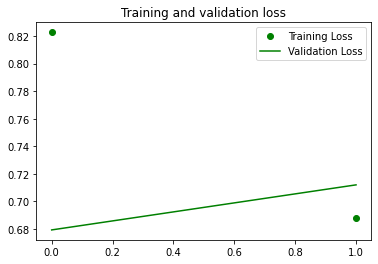

In [24]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving KakaoTalk_20220411_063656432_13.jpg to KakaoTalk_20220411_063656432_13.jpg
[1.]
KakaoTalk_20220411_063656432_13.jpg is a dog


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving cat.0.jpg to cat.0.jpg
[1.]
cat.0.jpg is a dog


In [ ]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=100,
                    epochs=10,
                    validation_steps=50,
                    verbose=2)

Epoch 1/10
100/100 - 79s - loss: 0.5901 - accuracy: 0.7080 - val_loss: 0.7404 - val_accuracy: 0.5890 - 79s/epoch - 793ms/step
Epoch 2/10
100/100 - 96s - loss: 0.4876 - accuracy: 0.7700 - val_loss: 0.8691 - val_accuracy: 0.5750 - 96s/epoch - 957ms/step
Epoch 3/10
100/100 - 74s - loss: 0.3929 - accuracy: 0.8135 - val_loss: 0.6210 - val_accuracy: 0.7150 - 74s/epoch - 741ms/step
Epoch 4/10
100/100 - 63s - loss: 0.3122 - accuracy: 0.8625 - val_loss: 0.6451 - val_accuracy: 0.7200 - 63s/epoch - 625ms/step
Epoch 5/10
100/100 - 60s - loss: 0.2348 - accuracy: 0.9070 - val_loss: 0.7510 - val_accuracy: 0.6970 - 60s/epoch - 605ms/step
Epoch 6/10
100/100 - 60s - loss: 0.1329 - accuracy: 0.9470 - val_loss: 1.1779 - val_accuracy: 0.6950 - 60s/epoch - 605ms/step
Epoch 7/10
100/100 - 62s - loss: 0.1182 - accuracy: 0.9680 - val_loss: 1.1983 - val_accuracy: 0.6970 - 62s/epoch - 623ms/step
Epoch 8/10
100/100 - 63s - loss: 0.0705 - accuracy: 0.9750 - val_loss: 1.1847 - val_accuracy: 0.7080 - 63s/epoch - 627

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving cat.0.jpg to cat.0 (1).jpg
[0.]
cat.0.jpg is a cat


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving KakaoTalk_20220411_063656432_13.jpg to KakaoTalk_20220411_063656432_13 (1).jpg
[1.]
KakaoTalk_20220411_063656432_13.jpg is a dog


In [ ]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=100,
                    epochs=10,
                    validation_steps=50,
                    verbose=2)

Epoch 1/10
100/100 - 77s - loss: 0.0644 - accuracy: 0.9865 - val_loss: 1.6497 - val_accuracy: 0.7180 - 77s/epoch - 773ms/step
Epoch 2/10
100/100 - 61s - loss: 0.0461 - accuracy: 0.9910 - val_loss: 2.0223 - val_accuracy: 0.7160 - 61s/epoch - 612ms/step
Epoch 3/10
100/100 - 63s - loss: 0.0311 - accuracy: 0.9915 - val_loss: 2.3601 - val_accuracy: 0.7040 - 63s/epoch - 632ms/step
Epoch 4/10
100/100 - 63s - loss: 0.0808 - accuracy: 0.9870 - val_loss: 2.1323 - val_accuracy: 0.7130 - 63s/epoch - 632ms/step
Epoch 5/10
100/100 - 61s - loss: 0.0428 - accuracy: 0.9910 - val_loss: 2.2525 - val_accuracy: 0.7180 - 61s/epoch - 606ms/step
Epoch 6/10
100/100 - 61s - loss: 0.0018 - accuracy: 0.9995 - val_loss: 8.4085 - val_accuracy: 0.5550 - 61s/epoch - 609ms/step
Epoch 7/10
100/100 - 63s - loss: 0.0660 - accuracy: 0.9885 - val_loss: 2.7537 - val_accuracy: 0.6880 - 63s/epoch - 630ms/step
Epoch 8/10
100/100 - 61s - loss: 0.0429 - accuracy: 0.9865 - val_loss: 2.6459 - val_accuracy: 0.6900 - 61s/epoch - 615

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving KakaoTalk_20220411_063656432_13.jpg to KakaoTalk_20220411_063656432_13 (2).jpg
[0.]
KakaoTalk_20220411_063656432_13.jpg is a cat


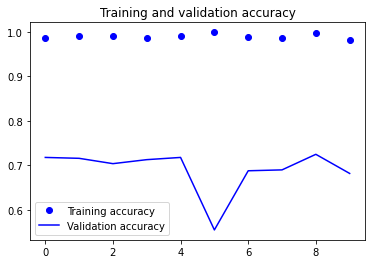

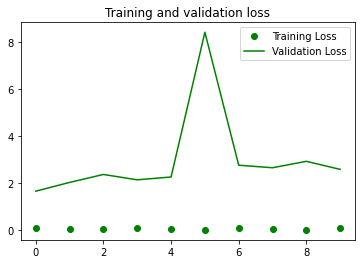

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving cat-101.jpg to cat-101.jpg
[1.]
cat-101.jpg is a dog


In [ ]:
# -- Save model -- 
model.save('/content/drive/MyDrive/deeplearning/tmp2/my_model-catdog-2.h5')

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving cat-104.jpg to cat-104.jpg
[1.]
cat-104.jpg is a dog


In [ ]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=100,
                    epochs=10,
                    validation_steps=50,
                    verbose=2)

Epoch 1/10
100/100 - 73s - loss: 0.0400 - accuracy: 0.9925 - val_loss: 2.4312 - val_accuracy: 0.6950 - 73s/epoch - 728ms/step
Epoch 2/10
100/100 - 63s - loss: 0.0098 - accuracy: 0.9970 - val_loss: 2.8557 - val_accuracy: 0.7210 - 63s/epoch - 629ms/step
Epoch 3/10
100/100 - 63s - loss: 0.1134 - accuracy: 0.9825 - val_loss: 2.5592 - val_accuracy: 0.6910 - 63s/epoch - 625ms/step
Epoch 4/10
100/100 - 61s - loss: 0.0259 - accuracy: 0.9940 - val_loss: 2.4150 - val_accuracy: 0.6990 - 61s/epoch - 606ms/step
Epoch 5/10
100/100 - 63s - loss: 4.6878e-04 - accuracy: 1.0000 - val_loss: 3.3870 - val_accuracy: 0.6960 - 63s/epoch - 630ms/step
Epoch 6/10
100/100 - 63s - loss: 0.0272 - accuracy: 0.9950 - val_loss: 4.6730 - val_accuracy: 0.6720 - 63s/epoch - 625ms/step
Epoch 7/10
100/100 - 60s - loss: 0.0135 - accuracy: 0.9975 - val_loss: 3.9266 - val_accuracy: 0.7020 - 60s/epoch - 603ms/step
Epoch 8/10
100/100 - 62s - loss: 0.0298 - accuracy: 0.9955 - val_loss: 2.8033 - val_accuracy: 0.7040 - 62s/epoch -

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving cat-104.jpg to cat-104 (1).jpg
[1.]
cat-104.jpg is a dog


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving cat-105.jpg to cat-105.jpg
[0.]
cat-105.jpg is a cat


In [ ]:
# -- Save model -- 
model.save('/content/drive/MyDrive/deeplearning/tmp2/my_model-catdog-3.h5')

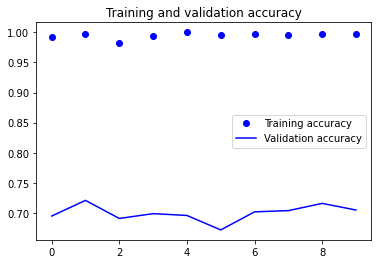

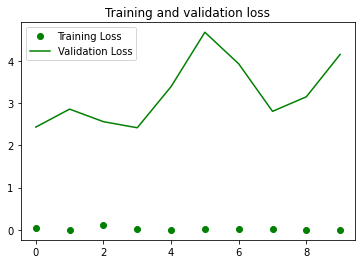

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

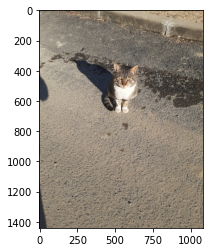

In [ ]:
img = tf.io.read_file("/content/drive/MyDrive/deeplearning/tmp2/test/cats/KakaoTalk_20220411_063656432_13.jpg")
tensor = tf.io.decode_image(img, channels=3, dtype=tf.dtypes.float32)
plt.imshow(tensor)

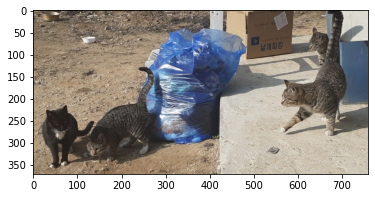

In [ ]:
img = tf.io.read_file("/content/drive/MyDrive/deeplearning/tmp2/test/cats/cat-105.jpg")
tensor = tf.io.decode_image(img, channels=3, dtype=tf.dtypes.float32)
plt.imshow(tensor)

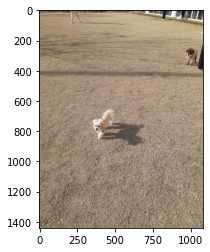

In [ ]:
# KakaoTalk_20220411_063656432_09
# KakaoTalk_20220411_063656432_03

img = tf.io.read_file("/content/drive/MyDrive/deeplearning/tmp2/test/dogs/KakaoTalk_20220411_063656432_09.jpg")
tensor = tf.io.decode_image(img, channels=3, dtype=tf.dtypes.float32)
plt.imshow(tensor)

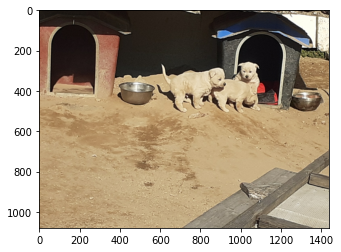

In [ ]:
img = tf.io.read_file("/content/drive/MyDrive/deeplearning/tmp2/test/dogs/KakaoTalk_20220411_063656432_03.jpg")
tensor = tf.io.decode_image(img, channels=3, dtype=tf.dtypes.float32)
plt.imshow(tensor)

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving KakaoTalk_20220411_063656432_03.jpg to KakaoTalk_20220411_063656432_03.jpg
[0.]
KakaoTalk_20220411_063656432_03.jpg is a cat


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving dog-101.jpg to dog-101.jpg
[0.]
dog-101.jpg is a cat


In [ ]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=100,
                    epochs=10,
                    validation_steps=50,
                    verbose=2)

Epoch 1/10
100/100 - 80s - loss: 0.0330 - accuracy: 0.9950 - val_loss: 3.1943 - val_accuracy: 0.6940 - 80s/epoch - 796ms/step
Epoch 2/10
100/100 - 61s - loss: 0.0022 - accuracy: 0.9990 - val_loss: 4.8475 - val_accuracy: 0.6890 - 61s/epoch - 610ms/step
Epoch 3/10
100/100 - 61s - loss: 2.9424e-05 - accuracy: 1.0000 - val_loss: 5.1337 - val_accuracy: 0.6700 - 61s/epoch - 613ms/step
Epoch 4/10
100/100 - 63s - loss: 0.0284 - accuracy: 0.9960 - val_loss: 4.8595 - val_accuracy: 0.6900 - 63s/epoch - 633ms/step
Epoch 5/10
100/100 - 74s - loss: 0.0292 - accuracy: 0.9955 - val_loss: 3.8092 - val_accuracy: 0.7110 - 74s/epoch - 740ms/step
Epoch 6/10
100/100 - 74s - loss: 0.0068 - accuracy: 0.9990 - val_loss: 4.0809 - val_accuracy: 0.7170 - 74s/epoch - 739ms/step
Epoch 7/10
100/100 - 67s - loss: 5.2912e-06 - accuracy: 1.0000 - val_loss: 4.7217 - val_accuracy: 0.7120 - 67s/epoch - 666ms/step
Epoch 8/10
100/100 - 89s - loss: 0.2353 - accuracy: 0.9890 - val_loss: 4.3348 - val_accuracy: 0.7020 - 89s/epo

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving dog-101.jpg to dog-101 (1).jpg
[0.]
dog-101.jpg is a cat


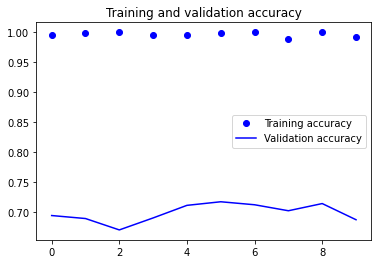

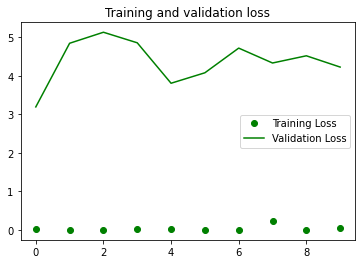

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# -- Save model -- 
model.save('/content/drive/MyDrive/deeplearning/tmp2/my_model-catdog-4.h5')

In [ ]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=100,
                    epochs=10,
                    validation_steps=50,
                    verbose=2)

Epoch 1/10
100/100 - 84s - loss: 0.0229 - accuracy: 0.9965 - val_loss: 4.6464 - val_accuracy: 0.6730 - 84s/epoch - 840ms/step
Epoch 2/10
100/100 - 77s - loss: 0.0291 - accuracy: 0.9970 - val_loss: 3.8875 - val_accuracy: 0.6960 - 77s/epoch - 768ms/step
Epoch 3/10
100/100 - 61s - loss: 0.0154 - accuracy: 0.9980 - val_loss: 4.3994 - val_accuracy: 0.6960 - 61s/epoch - 608ms/step
Epoch 4/10
100/100 - 63s - loss: 0.0252 - accuracy: 0.9960 - val_loss: 5.3112 - val_accuracy: 0.7150 - 63s/epoch - 629ms/step
Epoch 5/10
100/100 - 61s - loss: 0.0578 - accuracy: 0.9955 - val_loss: 5.0206 - val_accuracy: 0.6980 - 61s/epoch - 606ms/step
Epoch 6/10
100/100 - 60s - loss: 0.0086 - accuracy: 0.9960 - val_loss: 4.3856 - val_accuracy: 0.6860 - 60s/epoch - 604ms/step
Epoch 7/10
100/100 - 62s - loss: 0.0565 - accuracy: 0.9940 - val_loss: 5.0171 - val_accuracy: 0.7050 - 62s/epoch - 621ms/step
Epoch 8/10
100/100 - 62s - loss: 3.4102e-05 - accuracy: 1.0000 - val_loss: 5.5176 - val_accuracy: 0.6980 - 62s/epoch -

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving dog-101.jpg to dog-101 (2).jpg
[0.]
dog-101.jpg is a cat


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving dog-102.jpg to dog-102.jpg
[1.]
dog-102.jpg is a dog


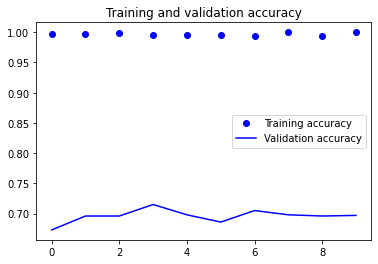

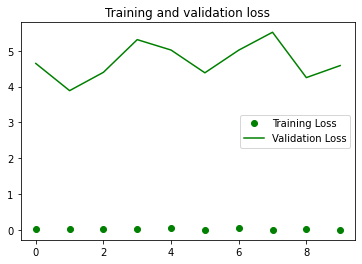

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# -- Save model -- 
model.save('/content/drive/MyDrive/deeplearning/tmp2/my_model-catdog-5.h5')

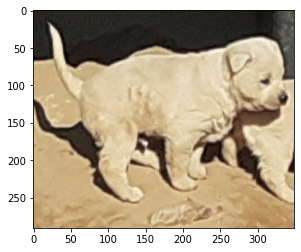

In [ ]:
img = tf.io.read_file("/content/drive/MyDrive/deeplearning/tmp2/test/dogs/dog-102.jpg")
tensor = tf.io.decode_image(img, channels=3, dtype=tf.dtypes.float32)
plt.imshow(tensor)

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving KakaoTalk_20220411_063656432_13.jpg to KakaoTalk_20220411_063656432_13 (3).jpg
[0.]
KakaoTalk_20220411_063656432_13.jpg is a cat


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving KakaoTalk_20220411_063656432_09.jpg to KakaoTalk_20220411_063656432_09 (1).jpg
[1.]
KakaoTalk_20220411_063656432_09.jpg is a dog
